In [1]:
# %%
""" Submission for Homework 1.X - Assessing the OLS Model """


' Submission for Homework 1.X - Assessing the OLS Model '

 # Homework 1.X. - Assessing the OLS Model

 ## Data Analysis

 ### FINM August Review



 Mark Hendricks



 hendricks@uchicago.edu

In [2]:
# %%
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score


 # 1 Multivariate Regression

 This problem utilizes the data in `../data/multi_asset_etf_data.xlsx`.

 * Return data on various asset classes.

 * This data comes via ETFs, which we will discuss in the Markets series.

 ## 1.1 Correlation



 Calculate and display the correlation matrix of the returns.



 Consider displaying it with `seaborn.heatmap`.



 Which pair has the highest correlation? And the smallest (most negative)?

Text(0.5, 1.0, 'Returns Correlation Heatmap')

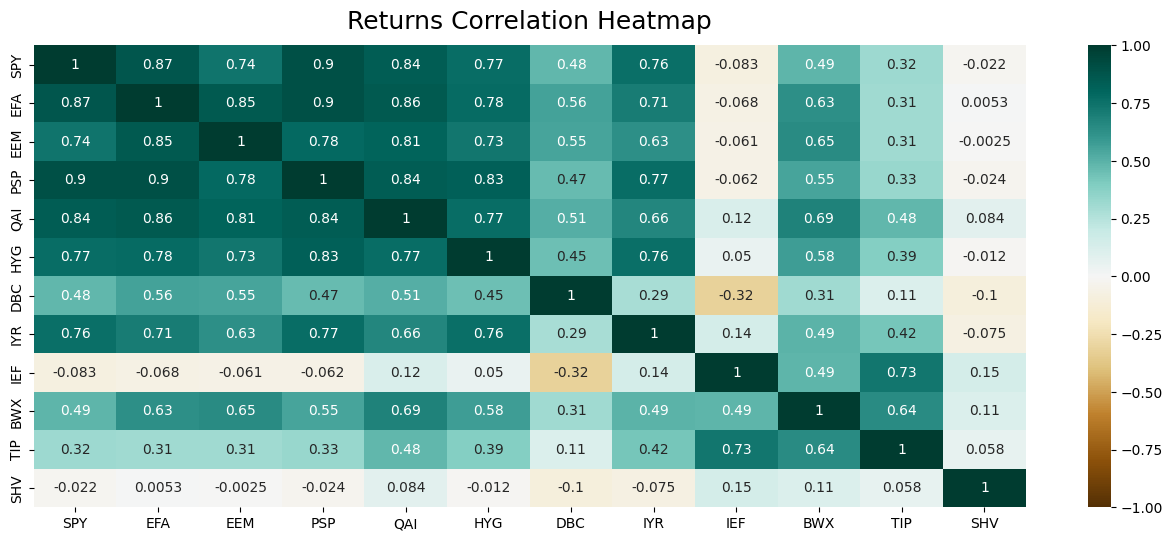

In [3]:
# %%
# Build the returns matrix
df_returns = pd.read_excel("../data/multi_asset_etf_data.xlsx", "total returns")
df_returns_dateless = df_returns.drop(columns=["Date"])

# Construct corr matrix
df_returns_corr = df_returns_dateless.corr()

# Build heatmap for returns correlations
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_returns_corr, vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Returns Correlation Heatmap", fontdict={"fontsize": 18}, pad=12)


 The pair with the highest correlation is a tie between (PSP, SPY) and (PSP, EFA)

 The pair with the most negative correlation is (IEF, DBC)

 ## 1.2 Multivariate Regression



 Suppose that we want to decompose `PSP` into a linear combination of other asset classes.

 * `PSP` is a benchmark of private equity returns.

 * There is substantial research (and controversy) as to whether private equity returns

     can be produced from other simple assets.

 * We will see.



 $$r_t^{\text{PSP}} = \alpha + \boldsymbol{\beta}\boldsymbol{r}_t + \epsilon_t$$



 where $\boldsymbol{r}_t$ denotes the vector of all the other returns (excluding PSP) at time $t$.



 Report

 * the estimated alpha

 * the estimated betas

 * the r-squared



 #### Python tip

 Consider forming `X = rets.drop(columns=['PSP'])`.



 Consider using one of the following for the regression.

 * `statsmodels.OLS`

 * `sklearn.linear_models.LinearRegression()`



 The former will include various regression statistics. The latter will just produce the estimates.

In [4]:
# %%
# Construct PSP and returns dataframes
df_returns_PSP = df_returns_dateless["PSP"]
df_returns_others = df_returns_dateless.drop(columns=["PSP"])
df_returns_others = sm.add_constant(df_returns_others)

# Construct, fit, and print results from our OLS model
part1_q2_model = sm.OLS(df_returns_PSP, df_returns_others)
part1_q2_results = part1_q2_model.fit()

# Report results
print("Our reported alpha and betas are:")
print(part1_q2_results.params)
print(f"Our reported rsquared is {round( part1_q2_results.rsquared, 4 )}")


Our reported alpha and betas are:
const   -0.001640
SPY      0.368790
EFA      0.567267
EEM     -0.018582
QAI      0.598149
HYG      0.476792
DBC     -0.117711
IYR      0.120730
IEF     -0.395851
BWX     -0.032385
TIP      0.223968
SHV     -0.776883
dtype: float64
Our reported rsquared is 0.8953


 ## 1.3 Interpretation



 Based on your estimates, do you think it is feasible to replicate `PSP` with

   these other assets? Be specific, citing your answers to the previous question. What does $\alpha$ indicate? What does the r-squared statistic indicate?

 It does seem feasible to replicate `PSP` with these other assets. There are two reasons for this:

 * Our $\alpha$ is low, at only $-0.001640$. This means that our regressors account for\

   the levels of the return

 * Our R-squared is high, at $0.8953$. This means that our regressors explain ~$90\%$ of the\

   variation in `PSP`

 ## 1.4 Multicollinearity



 Should we be worried about multicollinearity in this case?



 Calculate some metrics about $X'X$, (noting that in our case "$X$" is the array of return data, excluding `PSP`.



 * determinant

 * conditioning number



 What do these metrics indicate?



 #### Python tip

 You may find these `numpy` functions helpful:

 * `numpy.linalg.cond()`

 * `numpy.linalg.det()`

In [5]:
# %%
# Calculating metrics for X'X
x_prime_x = df_returns_others.T @ df_returns_others
det = np.linalg.det(x_prime_x)
cond = np.linalg.cond(x_prime_x)
print(
    f"We have a determinant of {round(det * (10 ** 12) , 4)} * 10^{-12}.\n"
    + f"We have a conditioning number of {round(cond , 4)}."
)


We have a determinant of 0.0531 * 10^-12.
We have a conditioning number of 608018.8178.


 Yes, multicollinearity is a potential issue. We already had a warning from the high correlation

 values in the above correlation matrix. We also learn something from the determinant and the

 conditioning number:

 * Determinant is nearly zero. This tells us that the matrix is close to being uninvertible

 * Similarly in its interpretation, the conditioning number is very high\

 All in all, this tells us that multicollinearity is a potential issue, and that our

 results are very sensitive to the inputs.

 ## 1.5 Impact of multicollinearity



 With multicollinearity, we are concerned that the regression estimates

 * are imprecise.

 * will change a lot in response to small changes in new data.

 * will perform badly out of sample.



 To investigate...

 * report the t-stats of the betas

In [6]:
# %%
# Reporting t-stats of the betas using the OLS results
print(part1_q2_results.tvalues)


const   -0.794026
SPY      3.558756
EFA      5.645017
EEM     -0.292215
QAI      2.073991
HYG      3.890249
DBC     -2.551795
IYR      2.190206
IEF     -2.056848
BWX     -0.243314
TIP      1.064455
SHV     -0.615372
dtype: float64


 We observe something interesting, as many of our t-values are above $2$. This indicates

 that there is a substantial impact on many of our regressors on the `PSP` index. However,

 precision is still in doubt.

 ## 1.X Extra:

 Estimate the regression, but this time using only data through 2019.

 * Apply these estimated betas to the data in 2020-2022 to construct the replication of `PSP` ($\hat{y}$) out of sample.

 * What is the correlation of PSP in 2020-2022 versus this out-of-sample regression estimate?



 Graph `PSP` against the regression estimate, both through 2019 (in sample) and 2020-2022 (out of sample.)

We observe the following beta-values in the pre-2020 regression:
SPY    0.362017
EFA    0.547259
EEM    0.063189
QAI   -0.003029
HYG    0.623415
DBC   -0.133373
IYR    0.026782
IEF   -0.507877
BWX   -0.002369
TIP    0.239509
SHV    0.185504
dtype: float64
We observe a correlation of 0.9471 between the fitted and observed values.


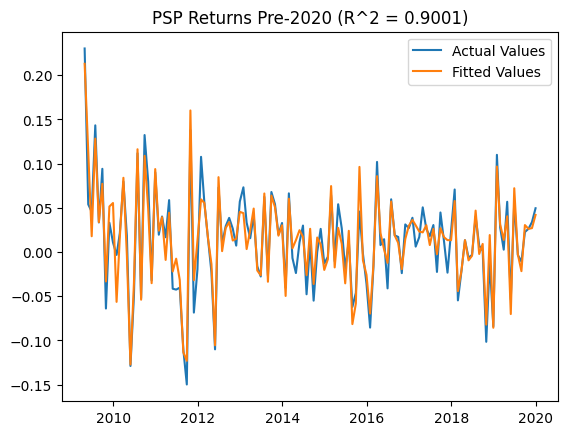

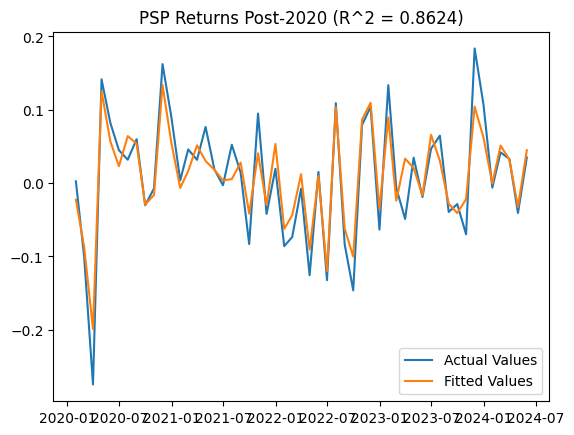

In [7]:
# %%
# Extract pre- and post- dates
cutoff = pd.Timestamp(2020, 1, 1, 0, 0)
df_dates = df_returns["Date"]
pre_dates = df_dates[df_dates < cutoff]
post_dates = df_dates[df_dates > cutoff]

# Split our data into pre- and post- 2020
df_pre_2020 = df_returns[df_returns["Date"] < cutoff]
df_pre_PSP = df_pre_2020["PSP"]
df_pre_others = df_pre_2020.drop(columns=["Date", "PSP"])

df_post_2020 = df_returns[df_returns["Date"] > cutoff]
df_post_PSP = df_post_2020["PSP"]
df_post_others = df_post_2020.drop(columns=["Date", "PSP"])

# Derive betas for pre-2020 data
extra_model = sm.OLS(df_pre_PSP, df_pre_others)
extra_results = extra_model.fit()
print("We observe the following beta-values in the pre-2020 regression:")
print(extra_results.params)

# Create fitted values for the output post-2020 using the pre-2020 betas
fitted_PSP = df_post_others @ extra_results.params

# Correlation matrix between fitted and observed PSP values
PSP_corr = np.corrcoef(fitted_PSP, df_post_PSP)[0][1]
print(
    f"We observe a correlation of {round(PSP_corr, 4)} between the fitted and observed values."
)

# Graph pre- and post- charts
plt.plot(pre_dates, df_pre_PSP, label="Actual Values")
plt.plot(pre_dates, extra_results.fittedvalues, label="Fitted Values")
plt.title(f"PSP Returns Pre-2020 (R^2 = {round(extra_results.rsquared, 4)})")
plt.legend()
plt.show()

plt.plot(post_dates, df_post_PSP, label="Actual Values")
plt.plot(post_dates, fitted_PSP, label="Fitted Values")
plt.title(
    f"PSP Returns Post-2020 (R^2 = {round(float(r2_score(df_post_PSP, fitted_PSP)), 4)})"
)
plt.legend()
plt.show()


 # Appendix: Condition number of a matrix



 $\newcommand{\olsb}{\boldsymbol{b}}$

 $\newcommand{\olsy}{\boldsymbol{y}}$



 Consider the linear equation



 $$\olsy = a + X\olsb + e$$



 Solving for $\olsb$,

 $$(X'X)\olsb = X'\olsy$$



 Denote the condition number of $X'X$ as $\kappa$.



 Then,

 $$\frac{||\delta \olsb||}{||\olsb||} \le \kappa \frac{||\delta X'\olsy||}{||X'\olsy||}$$



 #### This says that

 - estimation error of size $\delta$ in the covariation of $X$ and $\olsy$

 - will lead to errors up to size $\kappa\delta$ in the estimation of $\olsb$.

 ***

 # 2 Heteroskedasticity \& Serial Correlation

 $$\newcommand{\rspyt}{r_{\text{spy}}}$$

 $$\newcommand{\rspyt}{r_{\text{spy},t}}$$

 ## Data



 This problem uses the file, `../data/spy_rates_data.xlsx`.

 * Return rates for SPY, the return on the S\&P 500. Denote this as $\rspyt$.

 * Dividend-price ratio for the S\&P 500.

 * 10-year yields on US Treasuries.

 ## 2.1

 Use linear regression to calculate whether S\&P 500 returns (SPY) are impacted by 10-year

 yields and the dividend-price ratio.



 $$

 \rspyt = \alpha + \boldsymbol{\beta}'\boldsymbol{X}_t + \epsilon_t

 $$



 where $\boldsymbol{X}$ denotes the matrix of values of the 10-year-yield and the

 dividend-price ratio.



 Report the betas.

In [8]:
# %%
# Constructing date, SPY, and returns dfs
df_all_data = pd.read_excel("../data/spy_rate_data.xlsx")
df_dates = df_all_data.iloc[:, 0]
df_SPY = df_all_data["SPY US Equity"]
df_others = df_all_data.drop(list(df_all_data.columns[0:2]), axis=1)
df_others = sm.add_constant(df_others)

SPY_model = sm.OLS(df_SPY, df_others)
SPY_results = SPY_model.fit()
print("We report beta values of:")
print(SPY_results.params)


We report beta values of:
const              0.074096
10-yr Yields      -0.770736
Dvd-Price Ratio   -2.264593
dtype: float64


 ## 2.2

 Try using `statsmodels.OLS` to estimate the regression, and print the "summary" of the results

 which will show the t-stats, p-values, etc. Are either of the regressors are statistically

 significant?

In [9]:
# %%
# Printing the model results
print(SPY_results.summary())


                            OLS Regression Results                            
Dep. Variable:          SPY US Equity   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     4.465
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0125
Time:                        20:42:11   Log-Likelihood:                 423.48
No. Observations:                 239   AIC:                            -841.0
Df Residuals:                     236   BIC:                            -830.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0741      0.023     

 Yes, both the `10-yr Yields` and `Dvd-Price Ratio` regressors are significantly significant

 The p-values are $0.006$ and $0.008$, respectively.

 ## 2.3

 Calculate the correlation between the sample residuals, $e_t$, and their

 lagged value, $e_{t-1}$. Are they highly correlated? You may find it helpful to

 use .shift in pandas to get the lagged series.

In [10]:
# %%
# Calculating sample residuals
e_present = df_SPY - SPY_results.fittedvalues
e_t_plus_1 = e_present.shift(-1)[:-1]
e_present = e_present[:-1]

# Calculating and reporting correlation
residual_corr = np.corrcoef(e_present, e_t_plus_1)
print(f"We report a correlation of {round(residual_corr[0][1], 4)* 100}%")


We report a correlation of 5.09%


 We report a very low correlation between the present and lagged resiudals

 ## 2.4

 Calculate the regression of

 $$e_t = \alpha + \boldsymbol{\beta}'\boldsymbol{X}_t + u_t$$

In [14]:
# %%
# Calculating regression and reporting betas
##### MADE A MISTAKE !!! MAKE SURE TO REGRESS THE SQUARED RESIDUALS
residual_model = sm.OLS((df_SPY - SPY_results.fittedvalues)**2, df_others)
residual_results = residual_model.fit()
print(residual_results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     8.172
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           0.000370
Time:                        20:42:42   Log-Likelihood:                 1087.1
No. Observations:                 239   AIC:                            -2168.
Df Residuals:                     236   BIC:                            -2158.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0041      0.001     

 ## 2.5

 What do the previous two calculations have to do with identifying serial

 correlation and heteroskedasticity?

 The first calculation shows that our residuals are not serially correlated, as the

 residuals from one time period ago have no correlation to current residuals.

 The second calculation shows that our residuals are homoskedastic and that our

 model is well-specified. Our model regressors contribute nothing to our residuals.

 Below I include a helpful plot of the residuals to illustrate that they visually

 demonstrate this homoskedasticity.

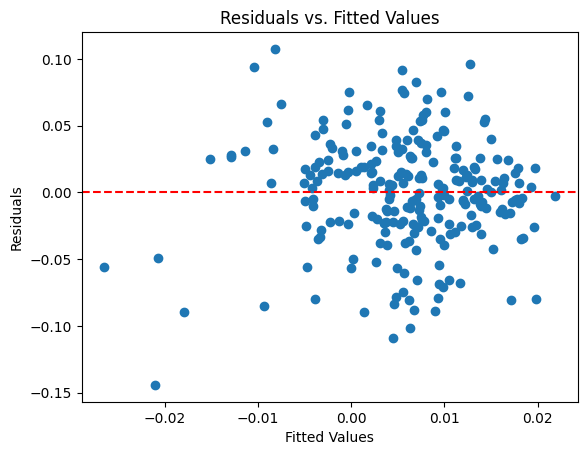

In [16]:
# %%
# Create residual plot against fitted values
plt.scatter(SPY_results.fittedvalues, (SPY_results.resid))
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()


In [13]:
# %%
